In [769]:
import numpy as np
from numpy import sin, log
from scipy.integrate import odeint,simps
import numpy.ma as ma
import matplotlib.pyplot as plt

In [1250]:
#create grid
Ndim=np.arange(-3,3+0.01,0.01)
X,Y=np.meshgrid(Ndim,Ndim,indexing='ij')
Z=X+Y*1j


In [1993]:
def F(X,Y,m=0.06577949225902557,angle= np.pi/4):
    z=X+1j*Y
    a=1+m
    eta=0.5*(z+np.sqrt(z-2)*np.sqrt(z+2))
    circulation=4*np.pi*a*sin(angle) # hard code l at 4 and tc/l at 8/100    
    K=1j*circulation*log((eta+m)/a)/(2*np.pi)
    eta = ma.masked_where(np.absolute(eta+m)<=a, eta) # mask the inner circle
    eta+=m
    res= eta*np.exp(-1j*angle)+(a**2*np.exp(1j*angle))/eta+K
    return res.real,res.imag,res
def Jokowski(z):
    res=z+1/z
    return res.real,res.imag,res
def W(X,Y,m=0.06577949225902557,angle= np.pi/4,flag=True):
    z=X+1j*Y
    a=1+m
    eta=0.5*(z+np.sqrt(z-2)*np.sqrt(z+2))
    
    deta_dz=0.5*(1+ z/(np.sqrt(z-2)*np.sqrt(z+2)))
    circulation=4*np.pi*a*sin(angle) # hard code l at 4 and tc/l at 8/100    
     
    if flag:
        eta = ma.masked_where(np.absolute(eta+m)<=a, eta) # mask the inner circle
    eta+=m
    # eta+=m
    K=1j*circulation/(2*np.pi*eta)
    res=np.exp(-1j*angle)-(a**2*np.exp(1j*angle)/np.power(eta,2))+K
    res*= deta_dz
    return res.real,-res.imag,res


<ipython-input-2031-f9ebf8462a03>:10: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  plt.contour(X,Y,psi,100,color="r",label="$\phi?$")


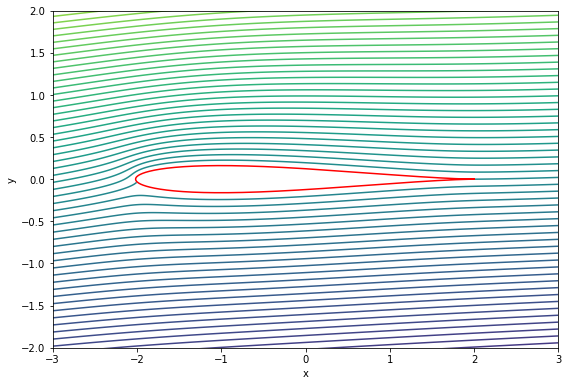

In [2031]:
plt.figure(figsize=(8,8))
angle=4*np.pi/180
theta = np.linspace(0, 2*np.pi, 601)
m=0.06577916443347931

phi,psi,Z=F(X,Y,m=m,angle=angle)
z = (1+m)*np.exp(1j*theta)-m
# plt.plot(z.real,z.imag,c="k")
_,_,z=Jokowski(z)
plt.contour(X,Y,psi,100,color="r",label="$\phi?$")
plt.plot(z.real,z.imag,c="r")

plt.ylim((-2,2))
plt.xlim((-3,3))
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.gca().set_aspect('equal')
# plt.colorbar()
# plt.savefig("../images/8p_P4.png",dpi=200,bbox_inches='tight')


<ipython-input-2023-a2bf904b91a4>:7: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  plt.contourf(X,Y,abs(Z),15,color="r",label="$\phi?$") # contour of velocity


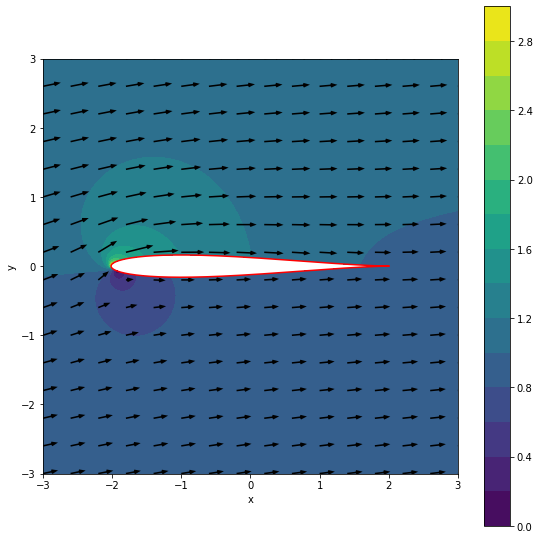

In [2023]:
plt.figure(figsize=(8,8))
u,v,Z=W(X,Y,m=m,angle=angle,flag=True)
z = (1+m)*np.exp(1j*theta)-m
# plt.plot(z.real,z.imag,c="k")
_,_,z=Jokowski(z)
Z.shape,z.shape
plt.contourf(X,Y,abs(Z),15,color="r",label="$\phi?$") # contour of velocity 
plt.colorbar()
skip = (slice(None, None, 40), slice(None, None, 40))

plt.quiver(X[skip],Y[skip],u[skip],v[skip],scale=25,headlength=4)
plt.plot(z.real,z.imag,c="r")
# yp=z.imag[:32]
# jloc=

# plt.ylim((-0.25,0.25))
# plt.xlim((-3,3))
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.gca().set_aspect('equal')
# plt.colorbar()
# plt.savefig("../images/2p_P3_vel_con.png",dpi=200,bbox_inches='tight')


<ipython-input-1993-96e30b215869>:19: RuntimeWarning: divide by zero encountered in true_divide
  deta_dz=0.5*(1+ z/(np.sqrt(z-2)*np.sqrt(z+2)))
<ipython-input-1993-96e30b215869>:19: RuntimeWarning: invalid value encountered in true_divide
  deta_dz=0.5*(1+ z/(np.sqrt(z-2)*np.sqrt(z+2)))
<ipython-input-1993-96e30b215869>:19: RuntimeWarning: invalid value encountered in multiply
  deta_dz=0.5*(1+ z/(np.sqrt(z-2)*np.sqrt(z+2)))


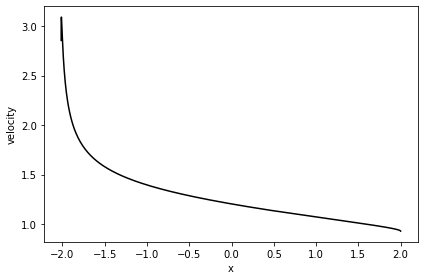

In [2026]:
u,v,Z=W(z.real[0:301],z.imag[0:301],m=m,angle=angle,flag=False)
plt.plot(z.real[0:301],abs(Z),c="k")
plt.xlabel("x")
plt.ylabel("velocity")
plt.tight_layout()
# plt.gca().set_aspect('equal')
# plt.colorbar()
# plt.savefig("../images/2p_P3_vel.png",dpi=200,bbox_inches='tight')

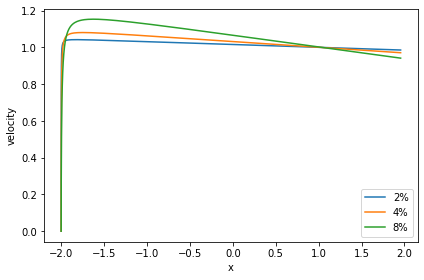

In [2015]:
# u,v,Z8=W(z.real[:301],z.imag[:301],m=m,angle=angle,flag=False)
plt.plot(z.real[20:301],abs(Z2),label="2%")
plt.plot(z.real[20:301],abs(Z4),label="4%")
plt.plot(z.real[20:301],abs(Z8),label="8%")
plt.xlabel("x")
plt.ylabel("velocity")
plt.tight_layout()
plt.legend()
# plt.savefig("../images/P3_vel.png",dpi=200,bbox_inches='tight')